In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#reading data from CSV file
data = pd.read_csv('monet.csv')
data

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


In [3]:
#describe the dataset
data.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [4]:
#check of null values
data.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

In [5]:
#logarithmic transformation of height and width
data['logarithm_Height'] = np.log2(data['HEIGHT'])
data['logarithm_Width'] = np.log2(data['WIDTH']) 

In [6]:
#Showing the dataframe
data 

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,logarithm_Height,logarithm_Width
0,3.993780,21.3,25.6,1,1,1,4.412782,4.678072
1,8.800000,31.9,25.6,1,2,2,4.995485,4.678072
2,0.131694,6.9,15.9,0,3,3,2.786596,3.990955
3,2.037500,25.7,32.0,1,4,2,4.683696,5.000000
4,1.487500,25.7,32.0,1,4,2,4.683696,5.000000
...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,4.678072,5.300124
426,9.352500,25.9,39.6,1,375,2,4.694880,5.307429
427,8.252500,25.6,39.6,1,375,1,4.678072,5.307429
428,3.410000,25.6,39.4,1,386,2,4.678072,5.300124


#Create Simple Linear Regression Models

In [7]:
Log_Height = data.iloc[:,6].values.reshape(-1,1)
Log_Width = data.iloc[:,7].values.reshape(-1,1)
Price = data.iloc[:,0].values.reshape(-1,1)

In [8]:
#split data into training and test sets 
Log_Height_trian, Log_Height_test, Price_trian, Price_test = train_test_split(Log_Height, Price, test_size = 0.2, random_state=0)

In [9]:
#create first simple linear regression model
lr1 = LinearRegression()
lr1.fit(Log_Height_trian, Price_trian)

LinearRegression()

In [10]:
#getting the prediction
Price_pred1 = lr1.predict(Log_Height_test)
Price_pred1

array([[ 2.95345489],
       [ 0.77221319],
       [ 3.17255892],
       [ 1.85682407],
       [ 2.95345489],
       [ 2.7202056 ],
       [ 1.96977419],
       [ 2.95345489],
       [ 1.74022978],
       [ 5.90302019],
       [ 3.00948872],
       [ 4.51176304],
       [ 4.51176304],
       [ 2.86774077],
       [ 2.40573695],
       [ 3.39166294],
       [ 2.95345489],
       [ 2.64411628],
       [ 2.95345489],
       [ 3.74860836],
       [ 4.12485817],
       [ 2.9815804 ],
       [ 2.65946284],
       [ 3.74860836],
       [ 3.75992014],
       [-0.23324412],
       [ 3.05095124],
       [ 3.36656486],
       [ 1.68049107],
       [ 3.74860836],
       [ 2.02495251],
       [ 4.21559372],
       [ 3.40414693],
       [ 3.67998397],
       [ 2.93930963],
       [ 4.51176304],
       [ 2.93930963],
       [ 4.24533964],
       [ 5.46561668],
       [ 2.00665318],
       [ 2.28887334],
       [ 2.68996183],
       [ 4.51176304],
       [ 5.18747104],
       [ 3.83812649],
       [ 2

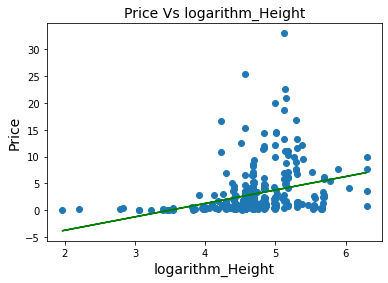

In [11]:
#Create a Scatter Plot of the first model
plt.scatter(Log_Height_trian, Price_trian)
plt.plot(Log_Height_trian, lr1.predict(Log_Height_trian), c='green')
plt.title("Price Vs logarithm_Height", fontsize=14)
plt.xlabel('logarithm_Height', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [12]:
#Calculate the error of the prediction test
print("R squared is: " , r2_score(Price_test,Price_pred1))
print("The Mean Square Error is: " , mean_squared_error(Price_test,Price_pred1))

R squared is:  0.15913791564737312
The Mean Square Error is:  15.225782132462292


In [13]:
#split data into training and test sets 
Log_Width_trian, Log_Width_test, Price_trian, Price_test = train_test_split(Log_Width, Price, test_size = 0.3, random_state=0)

In [14]:
#create second simple linear regression Model
lr2 = LinearRegression()
lr2.fit(Log_Width_trian, Price_trian)

LinearRegression()

In [15]:
#getting the prediction
Price_pred2 = lr2.predict(Log_Width_test)
Price_pred2

array([[ 4.14807464],
       [ 2.64078708],
       [ 3.78439879],
       [ 1.94603691],
       [ 3.77134851],
       [ 2.70662648],
       [-2.37438623],
       [ 3.1436253 ],
       [ 2.69025186],
       [ 8.02426777],
       [ 3.23226428],
       [ 4.14807464],
       [ 3.15851364],
       [ 3.69228596],
       [ 2.73920757],
       [ 4.4407143 ],
       [ 3.74514007],
       [ 3.06847649],
       [ 3.74514007],
       [ 3.74514007],
       [ 3.74514007],
       [ 4.17215986],
       [ 3.1436253 ],
       [ 2.09705977],
       [ 3.24687818],
       [ 1.04024897],
       [ 3.17335553],
       [ 3.69228596],
       [ 1.37616408],
       [ 4.14807464],
       [ 3.24687818],
       [ 2.64078708],
       [ 3.78439879],
       [ 3.05330321],
       [ 3.15851364],
       [ 7.4392111 ],
       [ 3.1436253 ],
       [ 2.73920757],
       [ 7.38449946],
       [ 1.7900616 ],
       [ 2.64078708],
       [ 3.05330321],
       [ 2.09705977],
       [ 4.1601325 ],
       [ 2.31496752],
       [ 2

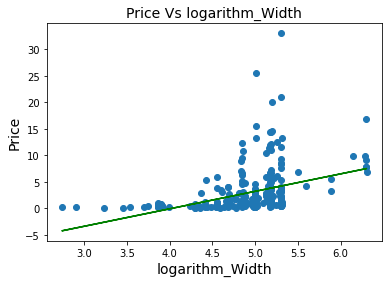

In [16]:
#Create a Scatter Plot of the second model
plt.scatter(Log_Width_trian, Price_trian)
plt.plot(Log_Width_trian, lr2.predict(Log_Width_trian), c='green')
plt.title("Price Vs logarithm_Width", fontsize=14)
plt.xlabel('logarithm_Width', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [17]:
#Calculate the error of the prediction test
print("R squared is: " , r2_score(Price_test,Price_pred2))
print("The Mean Square Error is: " , mean_squared_error(Price_test,Price_pred2))

R squared is:  0.03344669074761819
The Mean Square Error is:  19.721959629440388


# A multivariate linear regression model

In [18]:
data

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,logarithm_Height,logarithm_Width
0,3.993780,21.3,25.6,1,1,1,4.412782,4.678072
1,8.800000,31.9,25.6,1,2,2,4.995485,4.678072
2,0.131694,6.9,15.9,0,3,3,2.786596,3.990955
3,2.037500,25.7,32.0,1,4,2,4.683696,5.000000
4,1.487500,25.7,32.0,1,4,2,4.683696,5.000000
...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,4.678072,5.300124
426,9.352500,25.9,39.6,1,375,2,4.694880,5.307429
427,8.252500,25.6,39.6,1,375,1,4.678072,5.307429
428,3.410000,25.6,39.4,1,386,2,4.678072,5.300124


In [19]:
#finding the best features to use in training set
data.corrwith(data['PRICE']).sort_values(ascending=False)

PRICE               1.000000
WIDTH               0.346881
logarithm_Height    0.332641
logarithm_Width     0.331496
HEIGHT              0.314581
SIGNED              0.136362
PICTURE             0.106078
HOUSE              -0.039878
dtype: float64

In [20]:
data2 = data[['PRICE', 'WIDTH', 'logarithm_Height','logarithm_Width', 'HEIGHT']]
data2

,PRICE,WIDTH,logarithm_Height,logarithm_Width,HEIGHT
0,3.993780,25.6,4.412782,4.678072,21.3
1,8.800000,25.6,4.995485,4.678072,31.9
2,0.131694,15.9,2.786596,3.990955,6.9
3,2.037500,32.0,4.683696,5.000000,25.7
4,1.487500,32.0,4.683696,5.000000,25.7
...,...,...,...,...,...
425,5.282500,39.4,4.678072,5.300124,25.6
426,9.352500,39.6,4.694880,5.307429,25.9
427,8.252500,39.6,4.678072,5.307429,25.6
428,3.410000,39.4,4.678072,5.300124,25.6


In [21]:
X = data2.iloc[:, 1:]
Y= data2.iloc[:,0]

In [22]:
#split data into training and test sets 
X_trian, X_test, Y_trian, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [23]:
#Create a multivariate linear regression model and calculate the error of the prediction 
lr3 = LinearRegression(normalize=True)
lr3.fit(X_trian, Y_trian)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [24]:
#getting the prediction
Price_pred3 = lr3.predict(X_test)
Price_pred3

array([ 3.91630459,  1.35280027,  3.66771018,  1.51520105,  3.53696623,
        2.50841336,  0.06849028,  2.97713679,  1.94824858, 11.97916556,
        3.08140098,  4.72428461,  3.79741988,  3.41506638,  2.35902609,
        4.47054222,  3.51183722,  2.74675387,  3.51183722,  3.93407465,
        4.12690502,  3.95698619,  2.81660453,  2.64019478,  3.49150464,
       -0.19559276,  3.05449393,  3.68333255,  1.09282999,  4.33854201,
        2.54946719,  3.24812849,  3.79115449,  3.29001596,  2.98176654,
        9.93451793,  2.96946347,  3.33554725, 10.26041377,  1.50693434,
        2.22145237,  2.75968564,  3.02593737,  5.05896266,  2.82839813,
        2.42677659,  2.94487793,  7.53297657,  2.97713679,  2.22145237,
        3.79741988,  0.37990798,  3.4289055 ,  2.26974351,  2.0630555 ,
        2.84995016,  4.72428461,  3.57735775,  3.7335265 ,  1.50693434,
        3.75577232,  3.0169912 ,  3.03770459,  4.01732577,  1.07248416,
        2.47506773,  1.45148392,  3.97208925,  2.99707803,  2.80

In [25]:
#calculate the error of the prediction test
print("R squared is: " , r2_score(Y_test,Price_pred3))
print("The Mean Square Error is: " , mean_squared_error(Y_test,Price_pred3))

R squared is:  0.09646527266015459
The Mean Square Error is:  16.36061747055896
